<div id="container" style="position:relative;">
<div style="float:left"><h1> Mahyar Sabouniaghdam</h1></div>
<div style="position:relative; float:right"><img style="height:65px" src ="https://drive.google.com/uc?export=view&id=1EnB0x-fdqMp6I5iMoEBBEuxB_s7AmE2k" />
</div>
</div>

 # 

# Statistics & Public Health 1: Cleaning and EDA

* West Nile Virus (WNV) is a viral illness largely spread by mosquitoes. The disease is transmitted to a person when an infected mosquito bites them.

* The city of Chicago, Illinois has been keeping track of mosquito populations and WNV prevalence using a series of traps that they place around the city. They are then able to study the captured specimens and monitor the state of WNV spread in the city.

* mosquito tracking data from 2008 to 2019 is given below.

* In this deliverable, the focus is to perform basic EDA and data wrangling to get familiar with the dataset from the city of Chicago.

# 

# COLUMN NAME	DESCRIPTION	DATA TYPE	NOTES


* Trap: Some traps are "satellite traps". These are traps that are set up near (usually within 6 blocks) an established trap to enhance surveillance efforts. Satellite traps are post fixed with letters. For example, T220A is a satellite trap to T220.


* Date:	Please note that not all the locations are tested at all times. Also, records exist only when a particular species of mosquitoes is found at a certain trap at a certain time.


* Mosquito number:	These test results are organized in such a way that when the number of mosquitoes exceed 50, they are split into another record (another row in the dataset), such that the number of mosquitoes are capped at 50.


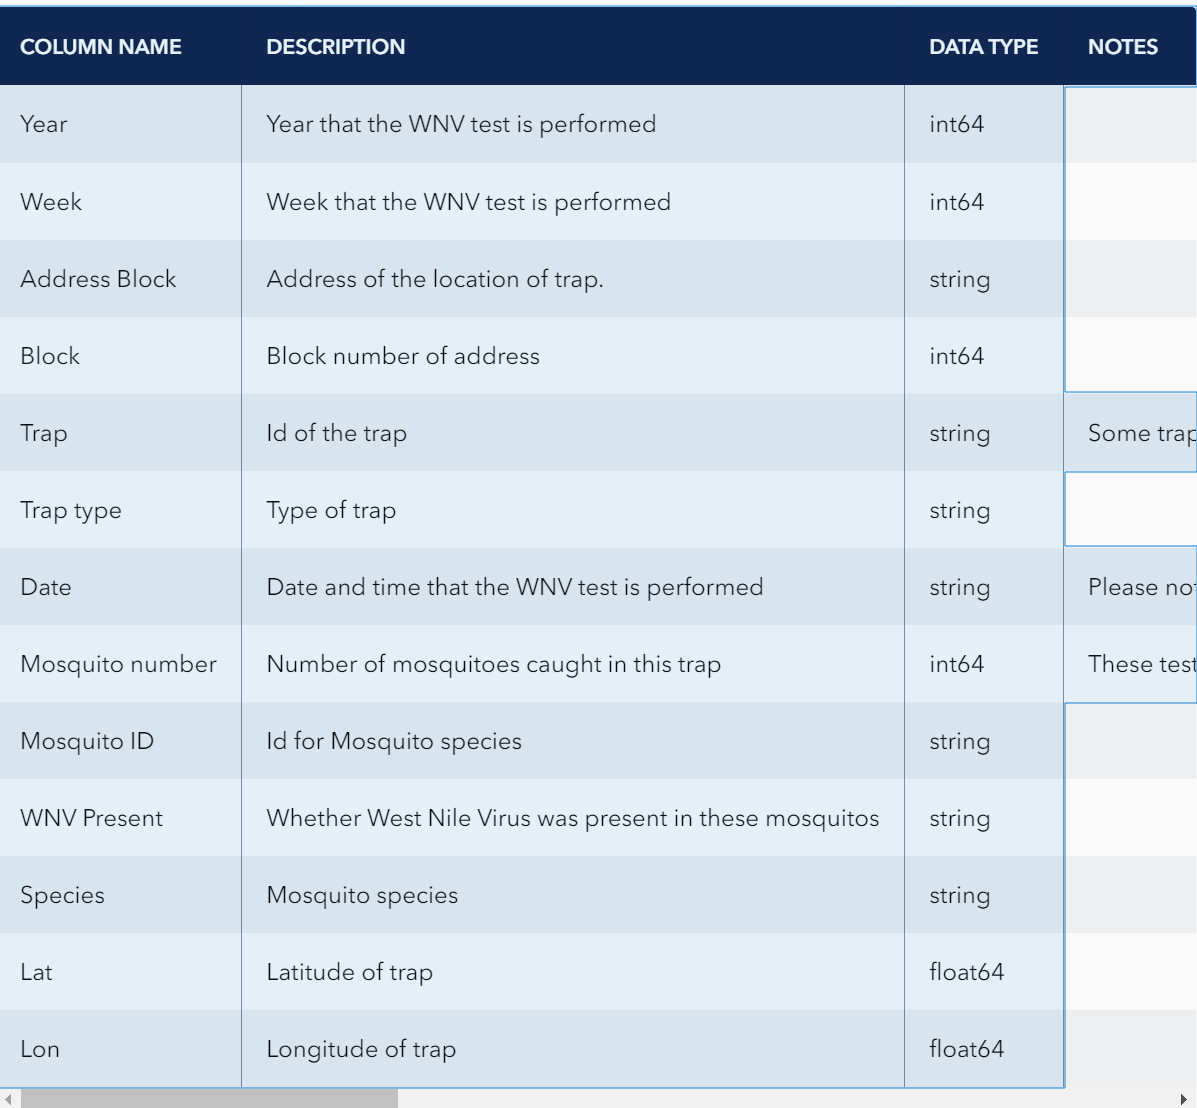

# 

# Questions





## Part 1 - Basic Data Wrangling

What is the shape of the dataframe?

Convert the 'Date' column to have a datetime format.

Pick two numeric and two categorical columns: What data they are storing? How are they distributed?

Are there any columns that contain duplicate information? If so, remove the redundant columns.

Are there any null values in the dataframe? If so, deal with them appropriately.

## Part 2 - Basic EDA

Using an appropriate visual, or visuals, explore the relationship between mosquito number and date.

## Part 3 - Advanced EDA
Using an appropriate visual, explore the relationship between mosquito species and WNV prevalence.

Using an appropriate visual, explore the relationship between the number of mosquitos caught and trap type.
Note: This visual should be a different type of visualization than the previous one

Using an appropriate visual, come up with an additional insight of your choice.
Note: This visual should be a different type of visualization than the previous two


# 

# Part 1 - Basic Data Wrangling

# 

### 1. What is the shape of the dataframe?

# 

In [1]:
# import packages

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

First, let's read in the data and take a look at what we're working with, and assess the level of cleaning and preprocessing that needs to be done.

In [2]:
mosquito_df = pd.read_csv('mosquito_data.csv')

In [3]:
mosquito_df.head(10)

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,NaN,NaN
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049
5,2019,39,21XX N CANNON DR,21,T054C,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.921777,-87.632140
6,2019,39,11XX W ROOSEVELT RD,11,T048,GRAVID,2019-09-26 00:09:00,3,Res,negative,CULEX RESTUANS,41.866915,-87.654919
7,2019,39,22XX W 51ST ST,22,T061,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.801048,-87.680425
8,2019,39,22XX N CANNON DR,22,T054A,GRAVID,2019-09-26 00:09:00,1,Ter,negative,CULEX TERRITANS,41.922737,-87.632450
9,2019,39,3XX W 104TH ST,3,T095,GRAVID,2019-09-26 00:09:00,1,Sal,negative,CULEX SALINARIUS,41.705328,-87.632955


## Let's look for suspicious columns for duplication:

In [4]:
mosquito_df[['Address Block','Block']].sample(20)

,Address Block,Block
5786,67XX S KEDZIE AVE,67
5736,71XX N HARLEM AVE,71
1696,22XX N CANNON DR,22
17550,70XX W ARMITAGE AVE,70
15748,77XX S EBERHART AVE,77
10761,70XX N MOSELLE AVE,70
1503,89XX S MUSKEGON AVE,89
653,100XX W OHARE AIRPORT,100
10299,35XX W 51ST ST,35
16196,100XX W OHARE AIRPORT,100


In [5]:
mosquito_df[['Mosquito ID','Species']].sample(20)

,Mosquito ID,Species
5081,Res,CULEX RESTUANS
11507,Res,CULEX RESTUANS
623,Res,CULEX RESTUANS
6143,Res,CULEX RESTUANS
13367,Res,CULEX RESTUANS
3626,Pip,CULEX PIPIENS
18423,Res,CULEX RESTUANS
5256,Res,CULEX RESTUANS
730,Res,CULEX RESTUANS
16400,Res,CULEX RESTUANS


### Now let's find out the `shape` of the dataframe:

In [6]:
mosquito_df.shape

(18495, 13)

In [7]:
print(f"The mosquito dataframe has {mosquito_df.shape[0]} rows and {mosquito_df.shape[1]} columns")

The mosquito dataframe has 18495 rows and 13 columns


### Let's go deeper by calling `info` on this data:

In [8]:
mosquito_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Block            18495 non-null  int64  
 4   Trap             18495 non-null  object 
 5   Trap type        18495 non-null  object 
 6   Date             18495 non-null  object 
 7   Mosquito number  18495 non-null  int64  
 8   Mosquito ID      18495 non-null  object 
 9   WNV Present      18495 non-null  object 
 10  Species          18495 non-null  object 
 11  Lat              15571 non-null  float64
 12  Lon              15571 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 1.8+ MB


# </font> <font color = magenta > Observations </font>

* 7 object, 4 int and 2 float data types, 13 columns in totall.

* 2 columns with missing data, null values (Lat and Lon).

* Address Block and Block columns seem to have duplicate information. The block number is repeated in Address column. <font color=red> (duplicate information) </font> <font color=blue> (column) </font>

* Some traps have a letter at the end. This means that they are satellite traps.

* Data type of the Date column is object. we have to convert it to datetime.

* Mosquito ID and Species columns have the same information. Mosquito ID is the shortened form of Species column. <font color=red> (duplicate information) </font> <font color=blue> (column) </font>

* As it is mentioned in the information section, the maximum number of mosquitoes is 50. When the number of mosquitoes exceed 50, they are split into another record (another row in the dataset). So, maybe we have to look for exact duplicate rows with same date and address but with different mosquito numbers and at least one 50 mosquito number and group them by the number of mosquitoes to one row. <font color=red> (duplicate information) </font> <font color=green> (row) </font>

* Week and Year columns are separated. As it is given from the information of dataset the year column is from 2008 to 2019.

# </font> <font color = magenta > Data cleaning to-do list: </font>

- Convert the datatype of the date column to datetime. ( Question 2 )
- Decide how to deal with duplicate infromation.  ( Question 4 )
- Impute null values or consider dropping observations with nulls.  ( Question 5 )
- How to Approach Trap column in terms of whether somehow splitting the satellite traps with regular ones or not.

# 

### 2. Convert the 'Date' column to have a datetime format.

# 

In [9]:
print (mosquito_df['Date'].dtypes)

object


- The datatype of `Date` column is string or object. So, we change it to datetime.

In [10]:
mosquito_df['Date'] = pd.to_datetime(mosquito_df['Date'])

In [11]:
print (mosquito_df['Date'].dtypes)

datetime64[ns]


In [12]:
mosquito_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Year             18495 non-null  int64         
 1   Week             18495 non-null  int64         
 2   Address Block    18495 non-null  object        
 3   Block            18495 non-null  int64         
 4   Trap             18495 non-null  object        
 5   Trap type        18495 non-null  object        
 6   Date             18495 non-null  datetime64[ns]
 7   Mosquito number  18495 non-null  int64         
 8   Mosquito ID      18495 non-null  object        
 9   WNV Present      18495 non-null  object        
 10  Species          18495 non-null  object        
 11  Lat              15571 non-null  float64       
 12  Lon              15571 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 1.8+ MB


- As we can see the datatype of `Date` column has changed to datetime format.

# 

### 3. Pick two numeric and two categorical columns: What data they are storing? How are they distributed?

# 

### Numerical Columns : Year, Week, Mosquito number

First let's calculate their mean, median and mode to explore them more:

In [59]:
# Year column

print(mosquito_df['Year'].mean())
print(mosquito_df['Year'].median())
print(mosquito_df['Year'].mode()[0])

2012.905812381725
2013.0
2007


In [57]:
# we're going to calculate mean median or mode

# week column

print(mosquito_df['Week'].mean())
print(mosquito_df['Week'].median())
print(mosquito_df['Week'].mode()[0])

31.004001081373342
31.0
32


In [58]:
# Mosquito number column

print(mosquito_df['Mosquito number'].mean())
print(mosquito_df['Mosquito number'].median())
print(mosquito_df['Mosquito number'].mode()[0])

10.879913490132468
5.0
1


#### Now let's explore them one by one and explain what data they are storing and how it is distributed:

We need to make some helper functions to visualize data easier:

In [13]:
# make a helper function for making histograms

def histogram_with_central_tendencies(column, bins = 10):
    
    plt.figure()
    plt.hist(mosquito_df[column],bins = (bins),color = 'grey')
    plt.xlabel(column)
    plt.axvline(mosquito_df[column].mean(),label = "mean",color = "red")
    plt.axvline(mosquito_df[column].median(),label = "median",color = "blue")
    plt.axvline(mosquito_df[column].mode()[0],label = "mode",color = "black")
    plt.legend()
    plt.title(f"column: {column}")
    plt.show()
    

In [14]:
# make a helper function for bar charts

def bar_chart_helper(column,fig_width = 10,fig_height = 10):
    
    plt.figure(figsize = (fig_width,fig_height))
    mosquito_df[column].value_counts().sort_values().plot(kind = "barh")
    plt.title(f"column: {column}")
    plt.show()

In [15]:
# make a helper function for boxplot

def boxplot_helper(column):
    sns.boxplot(x=column,data=mosquito_df)
    plt.title(f"{column}")
    plt.show()

### Year :

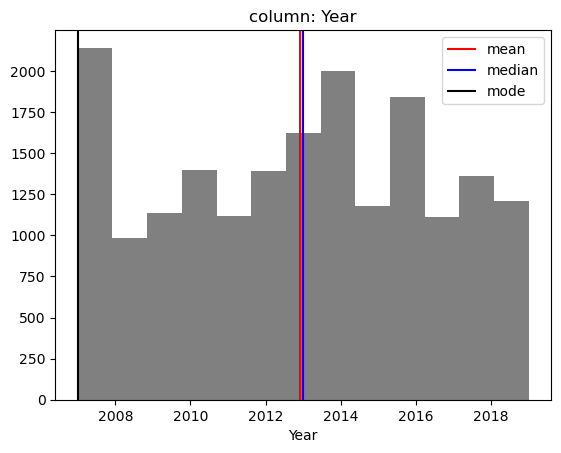

In [17]:
# Our data is between 13 years so I assign the bin number 13. ( bin=13 )

histogram_with_central_tendencies('Year', bins = 13)

As we explore the histogram we can find out the following information:
* Year column is the year that the WNV test is performed and</font> <font color = green> it is storing integer numbers from 2007 to 2019 </font>.
* </font> <font color = green > The distribution of the histogram is non-symmetric multimodal. </font>
* The year number is from 2007 to 2019. 
* In our dataset, the median year is 2013.
* Mean and median are almost the same amount.
* The distribution of the dataset is not the same in all years and it changed in different years.
* In 2007 we gathered the most data number (mode). After that, 2014, 2016 and 2013 have the highest numbers in our dataset.
* The lowest number is for 2008. maybe its due to investing alot and performing a lot of tests in 2007. 

### Week :

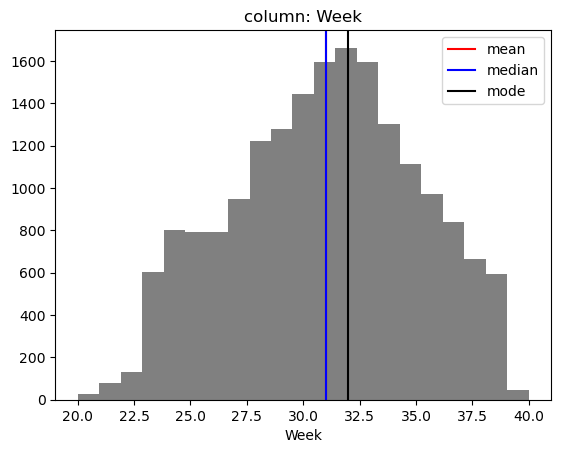

In [16]:
# Our data is between 21 weeks so I assign the bin number 21. ( bin=21 )

histogram_with_central_tendencies('Week', bins = 21)

As we explore the histogram we can find out the following information:

* Week column is the week that the WNV test is performed and</font> <font color = green> it is storing integer numbers from 20 to 40 </font>.
* </font> <font color = green > The distribution of the histogram is bell-shaped normal pattern and roughly symmetric. </font>
* The week number is between 20 to 40. Which it is from May up to the end of the September.
* Spring : May : week 20-22
* Summer : June, July, August : week 22-35
* Autumn : September : week 36-40
* In our dataset, the median and mean week is 31.
* In week 32 we gathered the most data number (mode).
* As we can see from the histogram, between week 27-33 we performed most of the tests which it represents July and August months in summer.
* The lowest number is for beginning and ending weeks which its in spring and autumn. Maybe its because of the weather conditions. Mosquitoes mostly appear in warmer weather conditions. So, its not rational to perform testing in cold weather.

### Mosquito number :

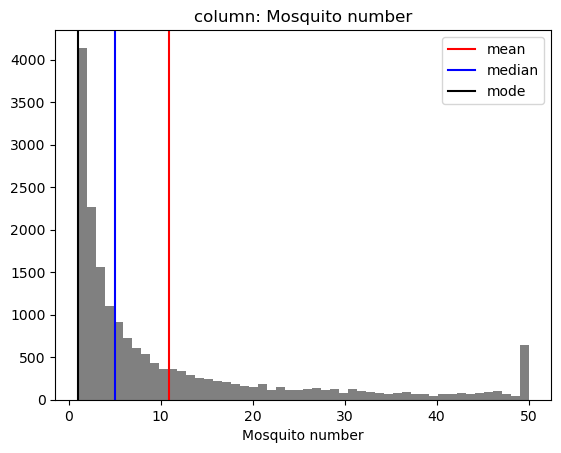

In [18]:
# Our data is between 50 numbers so I assign the bin number to 50. ( bin=50 )

histogram_with_central_tendencies('Mosquito number', bins = 50)

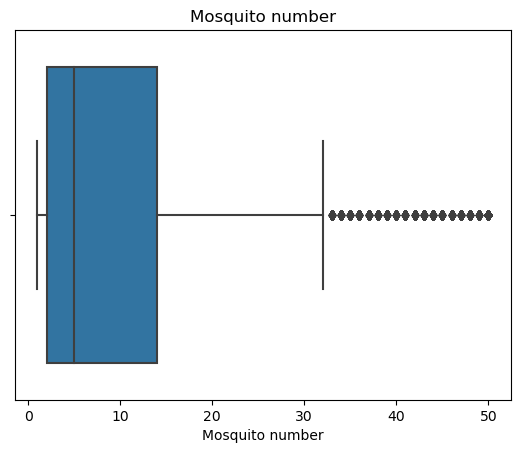

In [19]:
boxplot_helper('Mosquito number')

As we explore the histogram we can find out the following information:

* Mosquito number column is the number of mosquitoes caught in the performed trap and</font> <font color = green> it is storing integer numbers from 1 to 50 </font>.
* </font> <font color = green > The distribution of the histogram is positively skewed( first mode, then median, and lastly mean) and it has very skewed distribution. ( skewed right )  </font>
* The mean is 10, the median is 5 and the mode is 1. So, most of our traps only caught one mosquito.
* most traps caught low mosquito numbers ( 1,2,3,4 )
* The number 50 is because these test results are organized in such a way that when the number of mosquitoes exceed 50, they are split into another record (another row in the dataset), such that the number of mosquitoes are capped at 50.
* So if we perform data cleaning and deal with duplicate rows, the number of mosquitoes may exceed from 50 and we will not have as many number 50 as we have now in the histogram.
* As we can see from the boxplot after 32, we see outliers. It means that there were rare traps that caught more than 32 mosquitoes in one time.

### Categorical Columns : Trap type, WNV Present, Species or Mosquito ID ( they are the same(duplicate)

### Trap type :

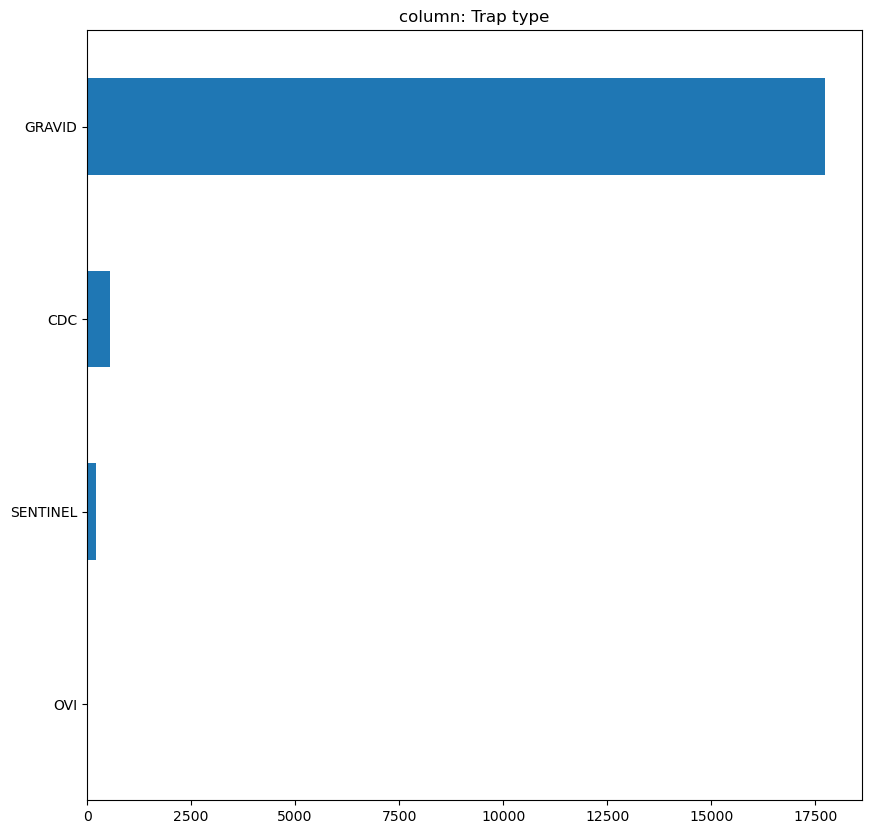

In [23]:
bar_chart_helper('Trap type')

In [66]:
mosquito_df['Trap type'].value_counts()

GRAVID      17741
CDC           544
SENTINEL      209
OVI             1
Name: Trap type, dtype: int64

In [65]:
mosquito_df['Trap type'].value_counts(normalize = True)

GRAVID      0.959232
CDC         0.029413
SENTINEL    0.011300
OVI         0.000054
Name: Trap type, dtype: float64

In [78]:
mosquito_df.loc[mosquito_df['Trap type'] == 'OVI']

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
15392,2007,23,5XX S CENTRAL AVE,5,T167,OVI,2007-06-29 11:06:17,1,Pip,negative,CULEX PIPIENS,41.872873,-87.764737


- The majority and nearly all of the traps were from GRAVID type.
- We have only one OVI trap type with negative result. So, its better to drop it bacause we cannot reach to any conclusion from it.
- number of CDC and SENTINEL trap types are 4 % of all, and 96% of the data belongs to GRAVID. 

### Species :

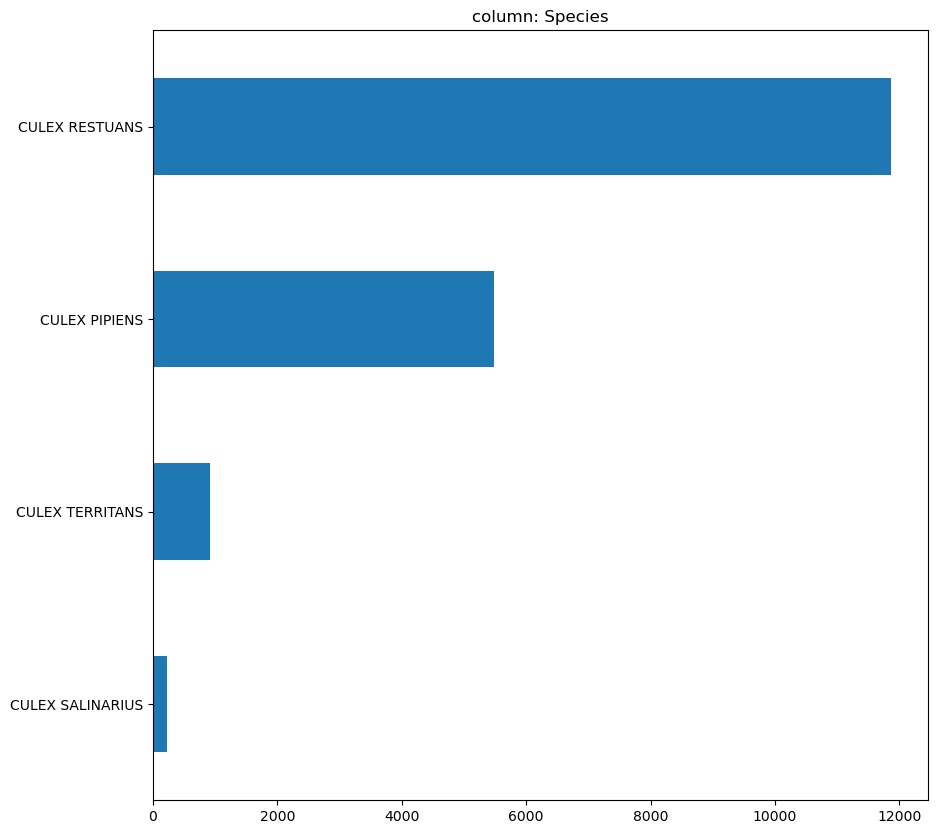

In [22]:
bar_chart_helper('Species')

In [67]:
mosquito_df['Species'].value_counts()

CULEX RESTUANS      11866
CULEX PIPIENS        5486
CULEX TERRITANS       917
CULEX SALINARIUS      226
Name: Species, dtype: int64

In [68]:
mosquito_df['Species'].value_counts(normalize = True)

CULEX RESTUANS      0.641579
CULEX PIPIENS       0.296621
CULEX TERRITANS     0.049581
CULEX SALINARIUS    0.012220
Name: Species, dtype: float64

- Most of the mosquitoes were from RESTUANS species. ( 65% )
- TERRITANS and SALINARIUS species had 5% of all and 95% of species belonged to RESTUANS and PIPIENS.
- Further investigation is needed to check the possible relationship between species and WNV presence.

### WNV Present :

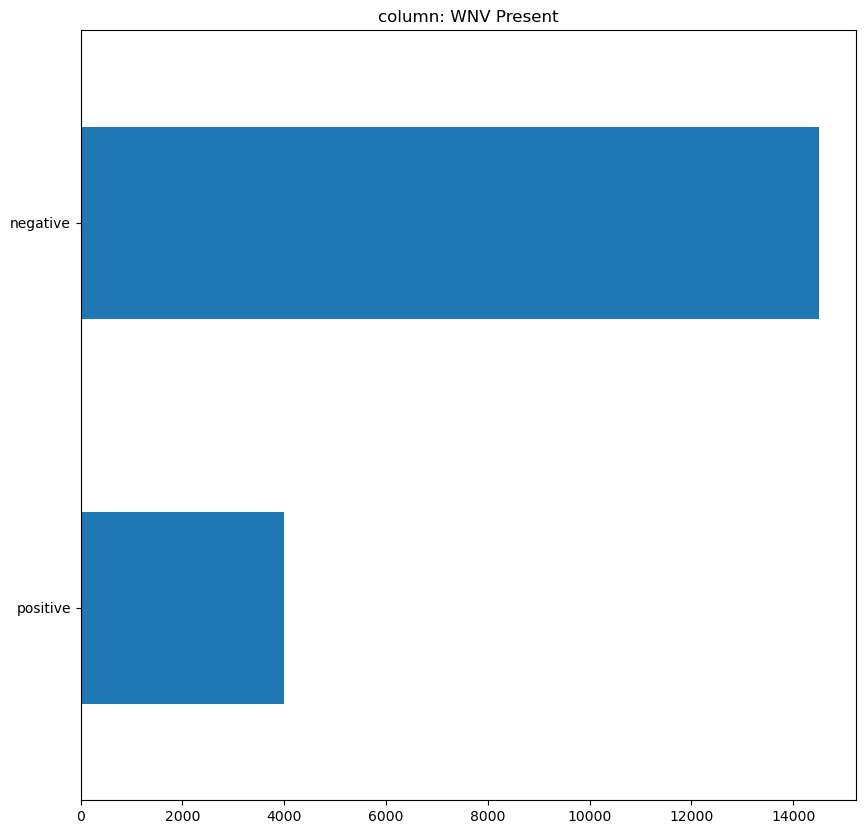

In [24]:
bar_chart_helper('WNV Present')

In [69]:
mosquito_df['WNV Present'].value_counts(normalize = True)

negative    0.78405
positive    0.21595
Name: WNV Present, dtype: float64

- WNV Present is our target column and it defines whether West Nile Virus was present in these mosquitos.
- We can see that most of our observed performed tests among a package of mosquitoes in that trap were negative.
- Only 21.5% of our traps showed the presence of WNV.

# 

### 4. Are there any columns that contain duplicate information? If so, remove the redundant columns.

# 

#### Duplicate columns: 

- As we saw in question 1 here we have two columns with duplicate information:
- Address Block and Block column : the Block number exists in address column.
- Mosquito ID and Species : Mosquito ID is the shortened form of Species.
- Note: As we see year and week columns already exist in date column but in date column we have timezone too, and in week column we precisely separate weeks. So, it will do no harm to keep year and week column. Besides, our dates are not continuous. we have gaps in months. so date column should be kept. 

 We drop the Block and Mosquito ID columns:

In [83]:
mosquito_df = mosquito_df.drop(columns=['Block', 'Mosquito ID'])

In [84]:
mosquito_df

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,NaN,NaN
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,negative,CULEX RESTUANS,41.657069,-87.546049
...,...,...,...,...,...,...,...,...,...,...,...
18490,2016,36,3XX W 18TH ST,T043,GRAVID,2016-09-09 00:09:00,4,positive,CULEX PIPIENS,41.857843,-87.635858
18491,2007,34,46XX N MILWAUKEE AVE,T003,GRAVID,2007-08-24 00:08:00,19,positive,CULEX PIPIENS,41.965376,-87.758403
18492,2016,30,127XX S DOTY AVE,T115,GRAVID,2016-07-27 00:07:00,34,positive,CULEX RESTUANS,41.662395,-87.590176
18493,2017,33,20XX N DOMINICK ST,T240B,SENTINEL,2017-08-17 00:08:00,50,positive,CULEX RESTUANS,41.919197,-87.664758


- Now we have 11 columns.

#### Duplicate rows: 

In [70]:
mosquito_df.duplicated().sum()

658

We have 658 duplicate rows. Let's see how percentage of our rows they are:

In [71]:
print(f"{round((mosquito_df.duplicated().sum()/mosquito_df.shape[0])*100,3)} percent of rows are duplicate")

3.558 percent of rows are duplicate


Let's explore the data too see whether they are truly duplicated or not.

In [92]:
mosquito_df[mosquito_df.duplicated(keep = False)].sort_values(by = ['Trap type','Species','Address Block','Lat','Lon','Date','Mosquito number']).head(40)

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon
10744,2010,33,100XX W OHARE AIRPORT,T908,CDC,2010-08-20 00:08:00,5,positive,CULEX PIPIENS,NaN,NaN
15849,2010,33,100XX W OHARE AIRPORT,T908,CDC,2010-08-20 00:08:00,5,positive,CULEX PIPIENS,NaN,NaN
17477,2010,33,100XX W OHARE AIRPORT,T908,CDC,2010-08-20 00:08:00,5,positive,CULEX PIPIENS,NaN,NaN
18120,2010,33,100XX W OHARE AIRPORT,T908,CDC,2010-08-20 00:08:00,5,positive,CULEX PIPIENS,NaN,NaN
18161,2010,33,100XX W OHARE AIRPORT,T908,CDC,2010-08-20 00:08:00,5,positive,CULEX PIPIENS,NaN,NaN
18467,2010,33,100XX W OHARE AIRPORT,T908,CDC,2010-08-20 00:08:00,5,positive,CULEX PIPIENS,NaN,NaN
14942,2007,28,4XX W 127TH,T135,CDC,2007-08-01 02:08:34,10,positive,CULEX PIPIENS,NaN,NaN
17486,2007,28,4XX W 127TH,T135,CDC,2007-08-01 02:08:34,10,positive,CULEX PIPIENS,NaN,NaN
17613,2007,28,4XX W 127TH,T135,CDC,2007-08-01 02:08:34,10,positive,CULEX PIPIENS,NaN,NaN
17733,2007,28,4XX W 127TH,T135,CDC,2007-08-01 02:08:34,10,positive,CULEX PIPIENS,NaN,NaN


- Seems unlikely that two unique individuals share exactly the same info in this dataset, especially with regard to Date and Mosquito number and Trap columns. ( We cannot have a data with the exact time (minutes and seconds) performed.)
- I had suspects about the idea of number of mosquitoes exceed from 50 and duplicate rows. But, as we can see the number of mosquitoes did not exceed 50 and the duplicate rows have same number less than 50. So, they are 100% duplicate.
- We can see rows with number 50 duplicated but it is highly unlikely to have test with 5 rows full 50 mosquito number. So, they are duplicated too.

So we'll remove duplicates:


In [93]:
mosquito_df.drop_duplicates(inplace=True) # in place is true so we don't have to make a new df

In [95]:
18495 - mosquito_df.shape[0] # verify we dropped the correct number of rows

658

We should also check that none of the columns in mosquito_df are perfect duplicates:

In [96]:
mosquito_df.T.duplicated().sum()

0

- So we don't have any perfect duplicates in our dataframe.
- Now we want to show the correlation between numeric columns:

In [97]:
mosquito_df.corr()

,Year,Week,Mosquito number,Lat,Lon
Year,1.000000,-0.022322,0.119070,0.064088,-0.040140
Week,-0.022322,1.000000,-0.033293,-0.001914,-0.009174
Mosquito number,0.119070,-0.033293,1.000000,0.059195,-0.100425
Lat,0.064088,-0.001914,0.059195,1.000000,-0.695048
Lon,-0.040140,-0.009174,-0.100425,-0.695048,1.000000


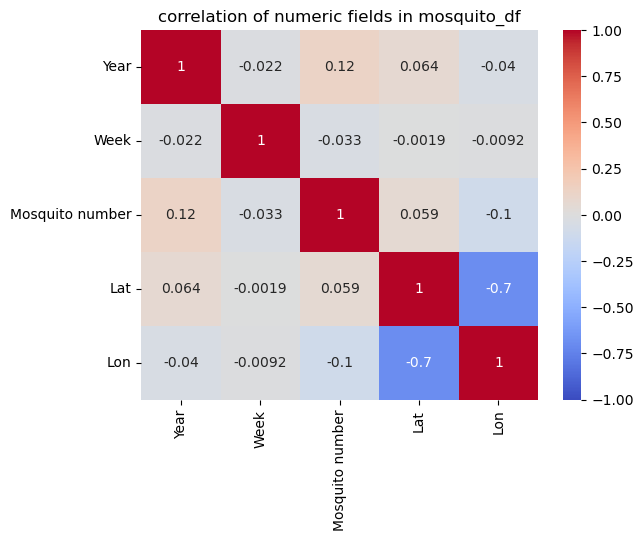

In [98]:
plt.figure()
sns.heatmap(mosquito_df.corr(),cmap = 'coolwarm',vmin = -1,vmax = 1,annot = True)
plt.title("correlation of numeric fields in mosquito_df")
plt.show()

- As we can see Lat and Lon are highly correlated. We were expecting that because these columns belong to location of a trap and they are in relation with each other.


# 

### 5. Are there any null values in the dataframe? If so, deal with them appropriately.

# 

In [100]:
mosquito_df.isnull().sum()

Year                  0
Week                  0
Address Block         0
Trap                  0
Trap type             0
Date                  0
Mosquito number       0
WNV Present           0
Species               0
Lat                2266
Lon                2266
dtype: int64

The table above shows the total nulls in each column. We only have null columns in Lat and Lon.

In [101]:
mosquito_df.isnull().mean() # to see it in percentage terms

Year               0.000000
Week               0.000000
Address Block      0.000000
Trap               0.000000
Trap type          0.000000
Date               0.000000
Mosquito number    0.000000
WNV Present        0.000000
Species            0.000000
Lat                0.127039
Lon                0.127039
dtype: float64

In [106]:
mosquito_df.loc[mosquito_df['Lat'].isnull()]

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,NaN,NaN
44,2019,38,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-19 00:09:00,3,negative,CULEX RESTUANS,NaN,NaN
55,2019,38,100XX W OHARE AIRPORT,T905,GRAVID,2019-09-19 00:09:00,2,negative,CULEX TERRITANS,NaN,NaN
57,2019,38,100XX W OHARE AIRPORT,T905,GRAVID,2019-09-19 00:09:00,4,negative,CULEX RESTUANS,NaN,NaN
93,2019,37,100XX W OHARE AIRPORT,T905,GRAVID,2019-09-12 00:09:00,2,negative,CULEX RESTUANS,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
15430,2007,24,4XX W 127TH,T135,CDC,2007-06-26 04:06:06,25,negative,CULEX RESTUANS,NaN,NaN
15439,2007,22,4XX W 127TH,T135,CDC,2007-06-05 00:06:00,4,negative,CULEX RESTUANS,NaN,NaN
15441,2007,22,43XX N ASHLAND,T145,GRAVID,2007-06-05 00:06:00,3,negative,CULEX RESTUANS,NaN,NaN
15452,2007,22,65XX N OAK PARK AVE,T143,GRAVID,2007-06-05 00:06:00,9,negative,CULEX RESTUANS,NaN,NaN


- Almost 13% of Lat and Lon columns are null. 13% is not a low percentage for null values.
- They are all longtitude and latitude of a location. Here we have many different locations with null value.
- In this case assigning them with any amount is not professional because we have the exact address for each location.
- So, I believe assigning a random related amount with backfill or ffill is more appropriate here with our limited knowledge. In this way we generated random locations.

In [109]:
for column in ['Lat','Lon']:
    
    mosquito_df[column] = mosquito_df[column].fillna(method ='bfill')

In [110]:
mosquito_df.isnull().sum()

Year               0
Week               0
Address Block      0
Trap               0
Trap type          0
Date               0
Mosquito number    0
WNV Present        0
Species            0
Lat                0
Lon                0
dtype: int64

Now we have no Null Values in our dataset.

# 

# Part 2 - Basic EDA

# 

### 1. Using an appropriate visual, or visuals, explore the relationship between mosquito number and date.

# 

- To explore this relation we create numeric columns.
- Then we show the distribution with boxplot.

In [115]:
# make a numeric dataframe

numeric_df = mosquito_df.select_dtypes(['int'])
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17837 entries, 0 to 18493
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Year             17837 non-null  int64
 1   Week             17837 non-null  int64
 2   Mosquito number  17837 non-null  int64
dtypes: int64(3)
memory usage: 1.0 MB


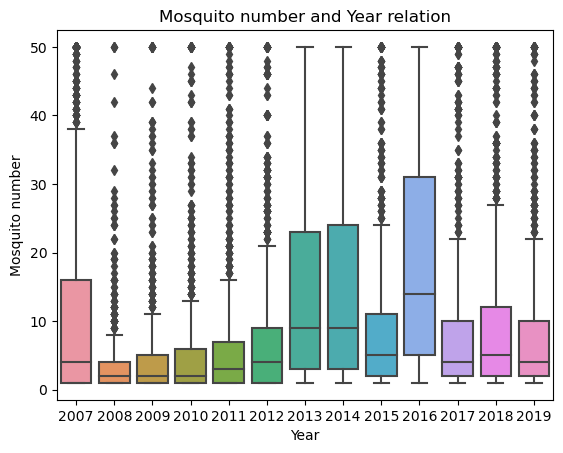

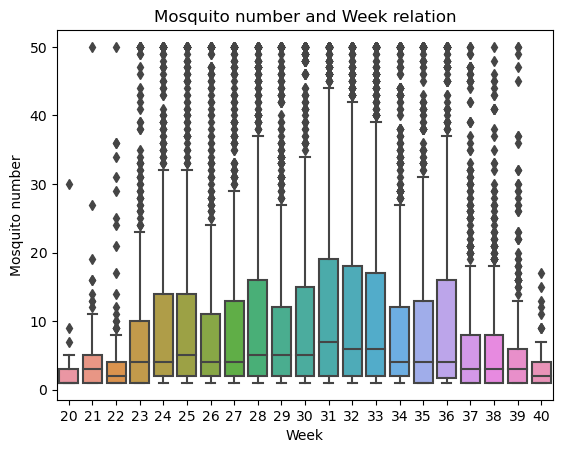

In [119]:
for col in numeric_df.columns[:-1]:
    
    sns.boxplot(x=col,y='Mosquito number',data=mosquito_df)
    plt.title(f"Mosquito number and {col} relation")
    plt.show()

- I want to examine the relationship between WNV present and year week and mosquito number columns too:

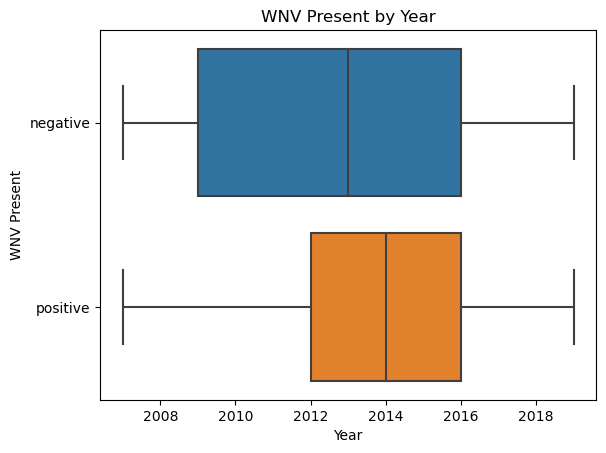

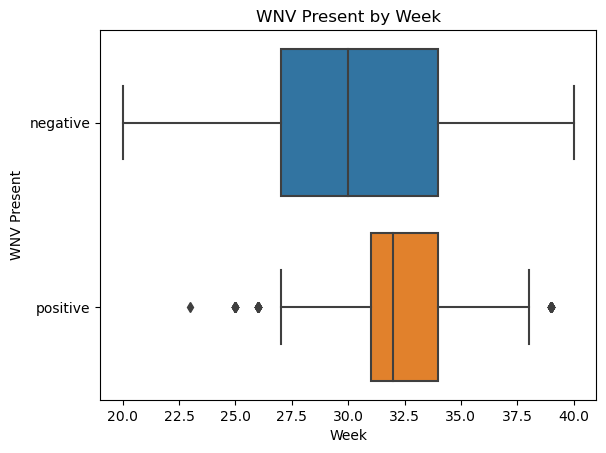

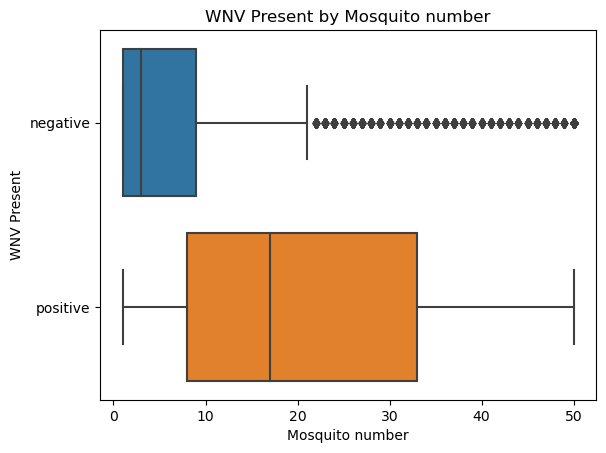

In [120]:
for col in numeric_df.columns:
    
    sns.boxplot(x=col,y='WNV Present',data=mosquito_df)
    plt.title(f"WNV Present by {col}")
    plt.show()

# </font> <font color = magenta > Observations </font>

- In 2016, 2014 and 2013 the number of mosquirtoes were higher than other years.
- These years have fewer outliers.
- Week between 27 and 33 which it is in summer we had the most number of mosquitoes caught in trap. Maybe it is because mosquitoes are more likely to live in warmer weather conditions.
- WNV Present is highly in relation with mosquito number.
- </font> <font color = blue >  The more mosquito number the more WNV presence.</font>
- </font> <font color = blue >  The number of positive WNV in week 31 to 33 were highest.</font>
- </font> <font color = blue >  Between 2012 and 2016 we have more WNV in mosquitoes.</font>

# 

# Part 3 - Advanced EDA

# 

### 1. Using an appropriate visual, explore the relationship between mosquito species and WNV prevalence.

# 

- We create a categorical data to examine the relationship:

In [131]:
# categorical data

categorical_df = mosquito_df[['Trap type','Species','WNV Present']]
large_categorical_df = mosquito_df[['Address Block', 'Trap','WNV Present']]

In [141]:
categorical_df.groupby(['Species','WNV Present'])['Species'].count()

Species           WNV Present
CULEX PIPIENS     negative       4074
                  positive       1237
CULEX RESTUANS    negative       9309
                  positive       2078
CULEX SALINARIUS  negative        215
                  positive          7
CULEX TERRITANS   negative        903
                  positive         14
Name: Species, dtype: int64

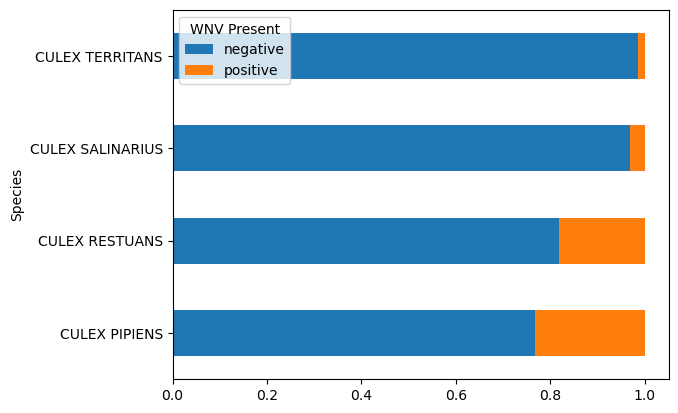

In [152]:
for col in categorical_df.columns[-2:-1]:
    
    agg_df = categorical_df.groupby([col,'WNV Present'])[col].count()/categorical_df.groupby(col)[col].count()
    agg_df.unstack().plot(kind = 'barh',stacked = True)
    plt.show()

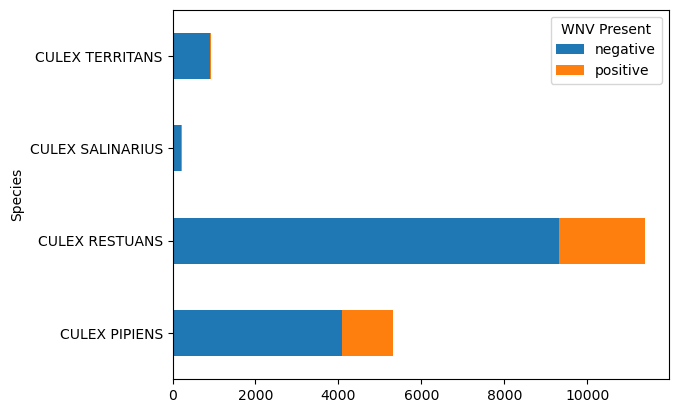

In [144]:
for col in categorical_df.columns[-2:-1]:
    
    agg_df = categorical_df.groupby([col,'WNV Present'])[col].count()
    agg_df.unstack().plot(kind = 'barh',stacked = True)
    plt.show()

# </font> <font color = magenta > Observations </font>
- The number of RESTUANS with positive WNV is higher than PIPIENS with positive WNV. Thats because we have more of this species in our traps rather than PIPIENS species.
- On the other hand, </font> <font color = blue > The percentage of positive WNV PIPIENS mosquitoes is higher than that of RESTUANS mosquitoes. </font>
-  </font> <font color = blue > Therefore, the chance of having WNV positive is higher in PIPIENS than RESTUANS. </font>

# 

### 2. Using an appropriate visual, explore the relationship between the number of mosquitos caught and trap type.

# 

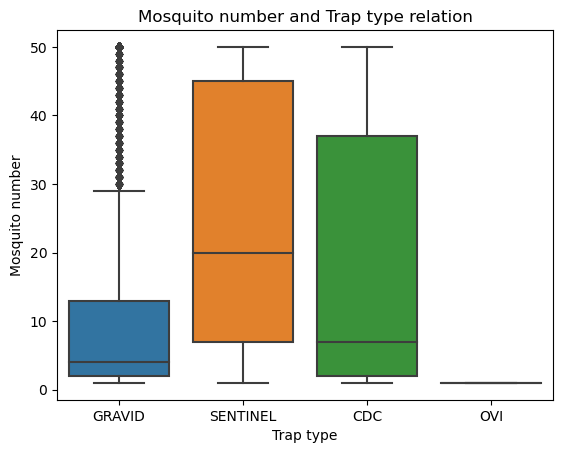

In [147]:
sns.boxplot(x='Trap type',y='Mosquito number',data=mosquito_df)
plt.title(f"Mosquito number and Trap type relation")
plt.show()

# </font> <font color = magenta > Observations </font>
- From the middle line of each boxplot (median) and lower line which is 25% percentile we can understand that :
- </font> <font color = brown >Although GRAVID Trap type is more in number, SENTINEL Trap type has caught more number of mosquitoes than GRAVID. We can see that the median of SENTINEL is 20 but for GRAVID is 4. CDC and GRAVID have almost the same median but for CDC is slightly higher.</font>
- </font> <font color = blue > So, SENTINEL Trap type can caught higher number of mosquitos each time (almost 4 times more than GRAVID).</font>
- - </font> <font color = grey > So, maybe if we change our trap type to SENTINEL we can catch more mosquitoes and we will have better outcome .</font>

# 

### 3. Using an appropriate visual, come up with an additional insight of your choice.

# 

- The relationship between WNV Present, year and Mosquito number in violin plot:

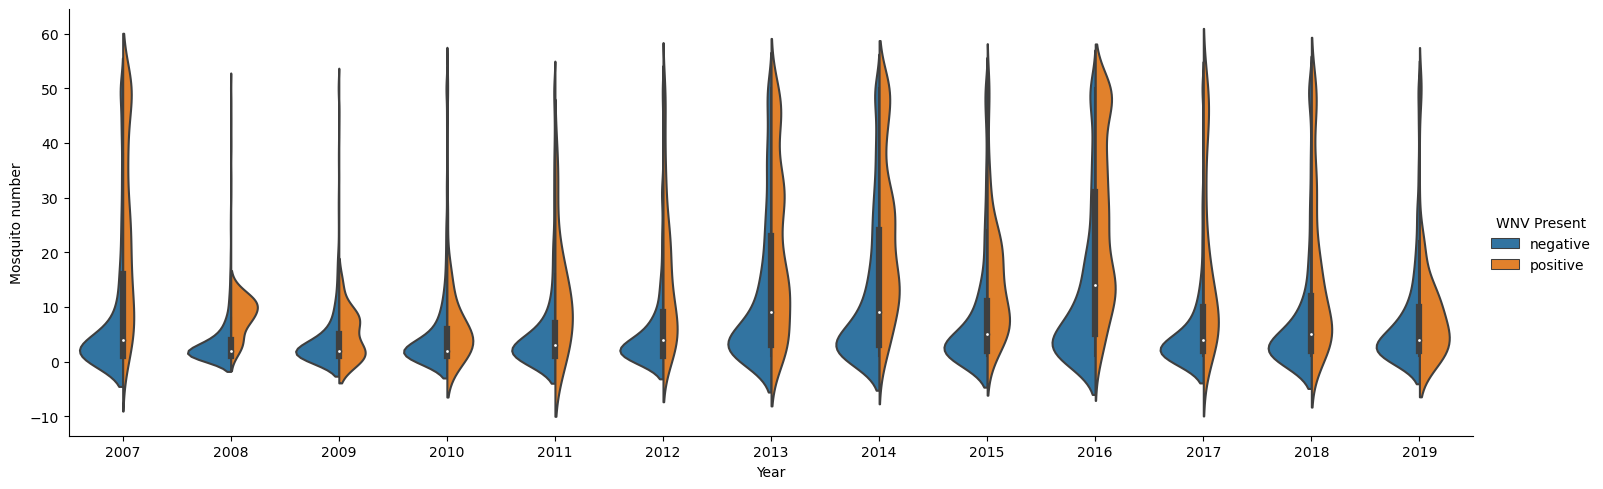

In [124]:
sns.catplot(data=mosquito_df, x="Year", y="Mosquito number", hue="WNV Present", kind="violin" \
            , split=True, legend_out=True, aspect= 3)


# </font> <font color = magenta > Observations </font>
- Here we can see the ditribution of diiferent mosquito number in each year and whether WNV is positive or negative.
- Most of the negative cases have really low mosquito number in each year.
- In 2016,2014 and 2013 we have highet number of mosquitoes caught each time with positive WNV rather than other years.
- In 2019 we have so many positive WNV with samll number of mosquitoes.
- </font> <font color = brown > In 2019, although the number of mosquitoes were really low, we have the most number of positive WNV. This means that maybe WNV is getting more in 2019 because even small mosquito caught in each trap has positive virus. </font>

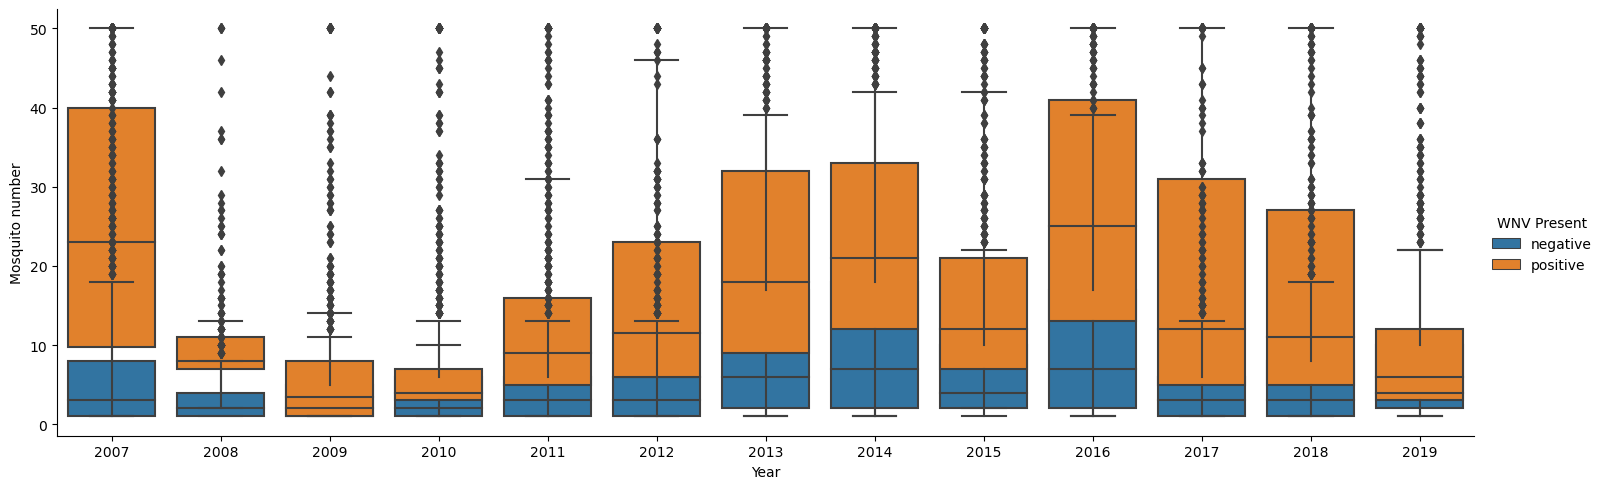

In [153]:
sns.catplot(data=mosquito_df, x="Year", y="Mosquito number", hue="WNV Present", kind="box", dodge=False, legend_out=True, aspect= 3)

# Other :


## Relation between location and Trap type, Species, WNV Present

<AxesSubplot:xlabel='Lon', ylabel='Lat'>

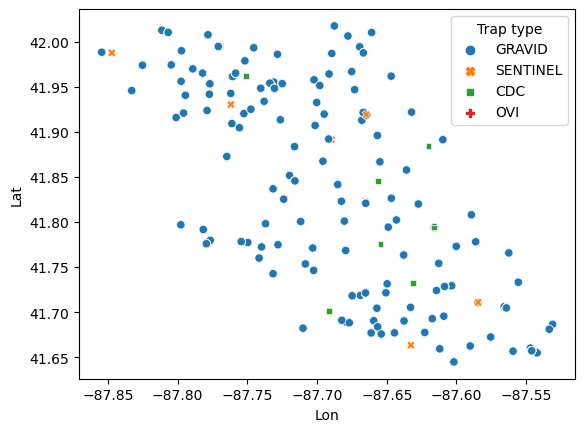

In [30]:
sns.scatterplot(
    data=mosquito_df, x="Lon", y="Lat", hue='Trap type', style='Trap type',
    legend="full"
)

<AxesSubplot:xlabel='Lon', ylabel='Lat'>

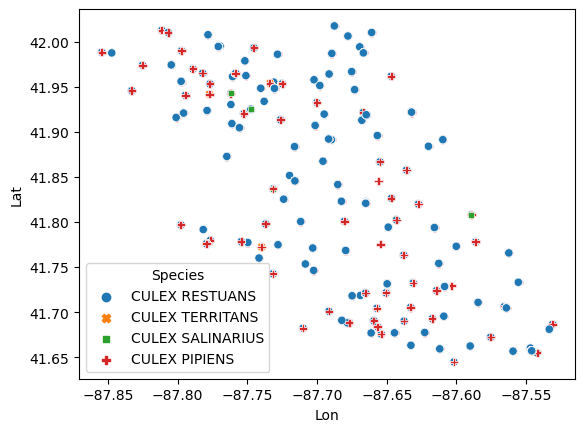

In [130]:
sns.scatterplot(
    data=mosquito_df, x="Lon", y="Lat", hue='Species', style='Species',
    legend="full"
)

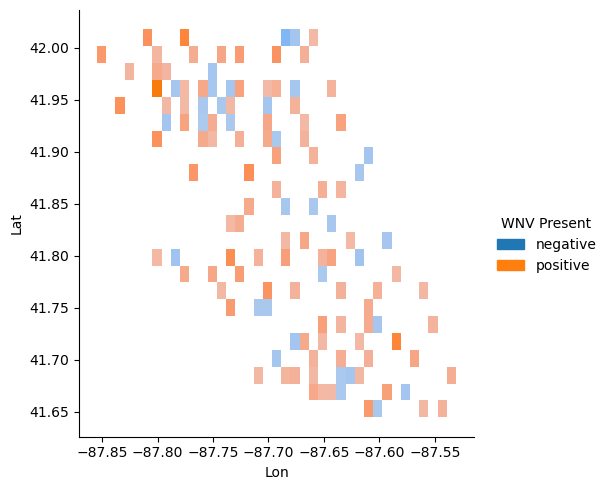

In [129]:
sns.displot(mosquito_df, x="Lon", y="Lat", hue='WNV Present')

# Other visualizations for my own:

<AxesSubplot:xlabel='Trap type', ylabel='count'>

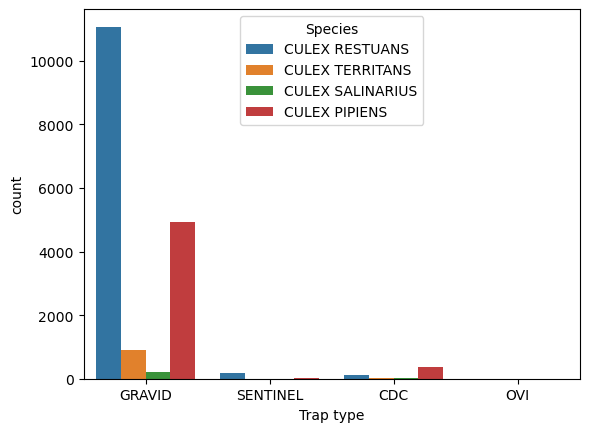

In [150]:
sns.countplot(data = mosquito_df, x='Trap type' ,hue='Species')

<AxesSubplot:xlabel='Trap type', ylabel='count'>

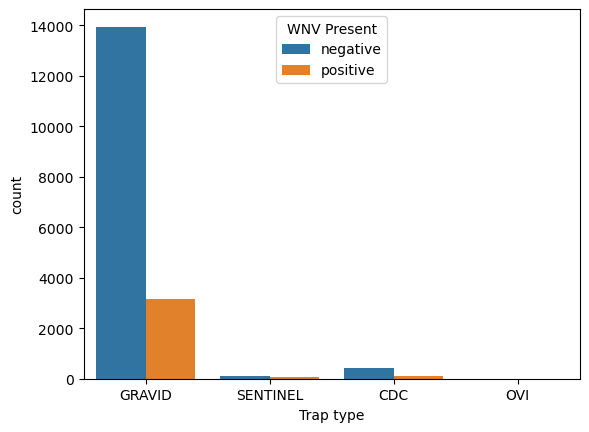

In [127]:
sns.countplot(data = mosquito_df, x='Trap type' ,hue='WNV Present')

<AxesSubplot:xlabel='Lon', ylabel='Lat'>

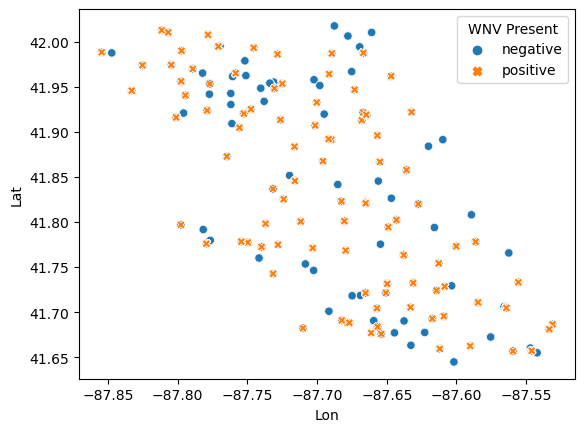

In [123]:
sns.scatterplot(
    data=mosquito_df, x="Lon", y="Lat", hue='WNV Present', style='WNV Present',
    legend="full"
)

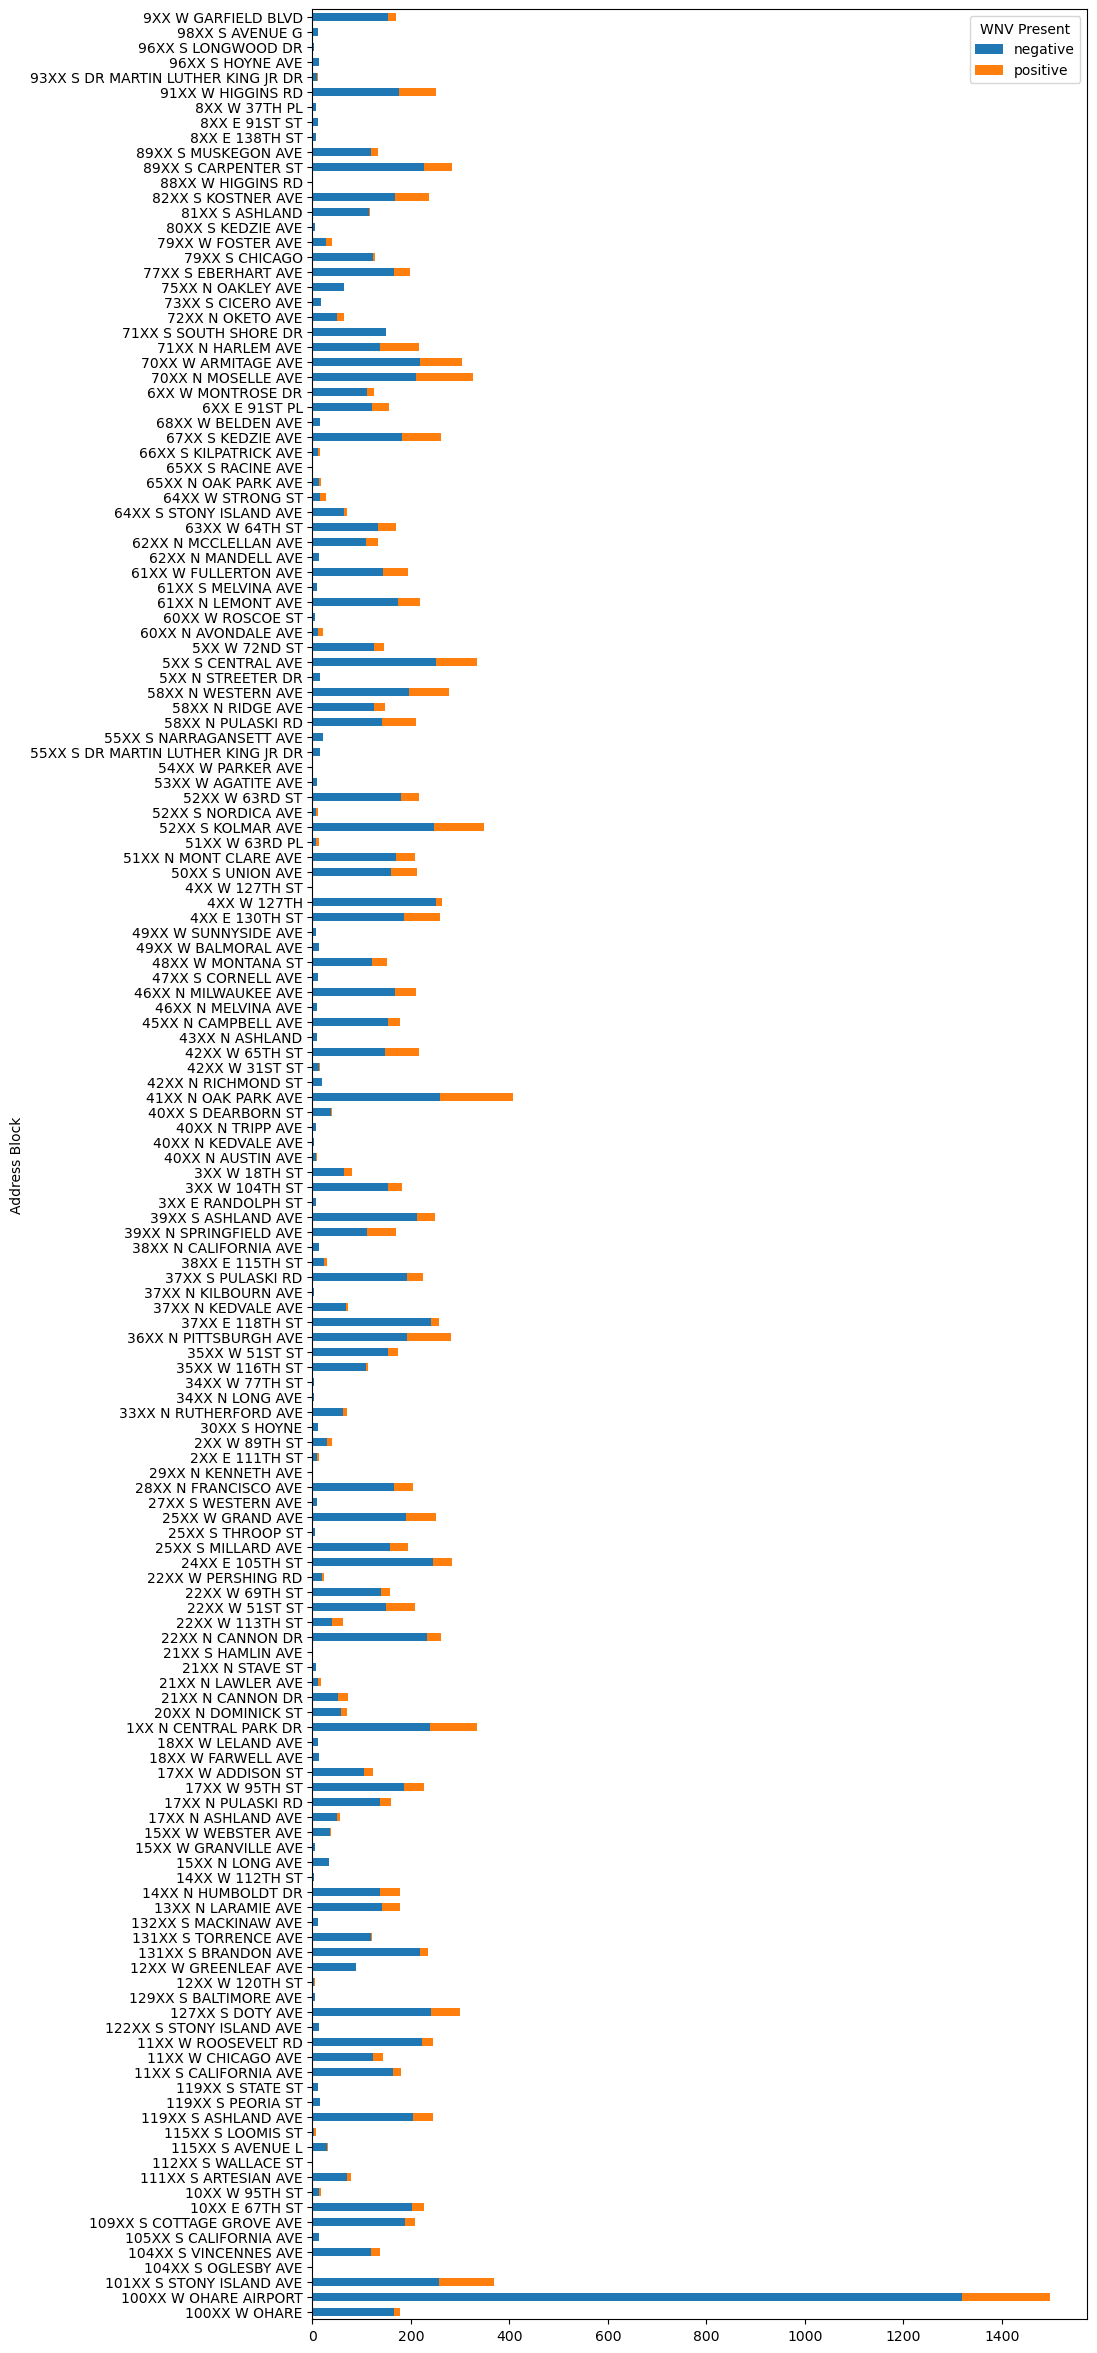

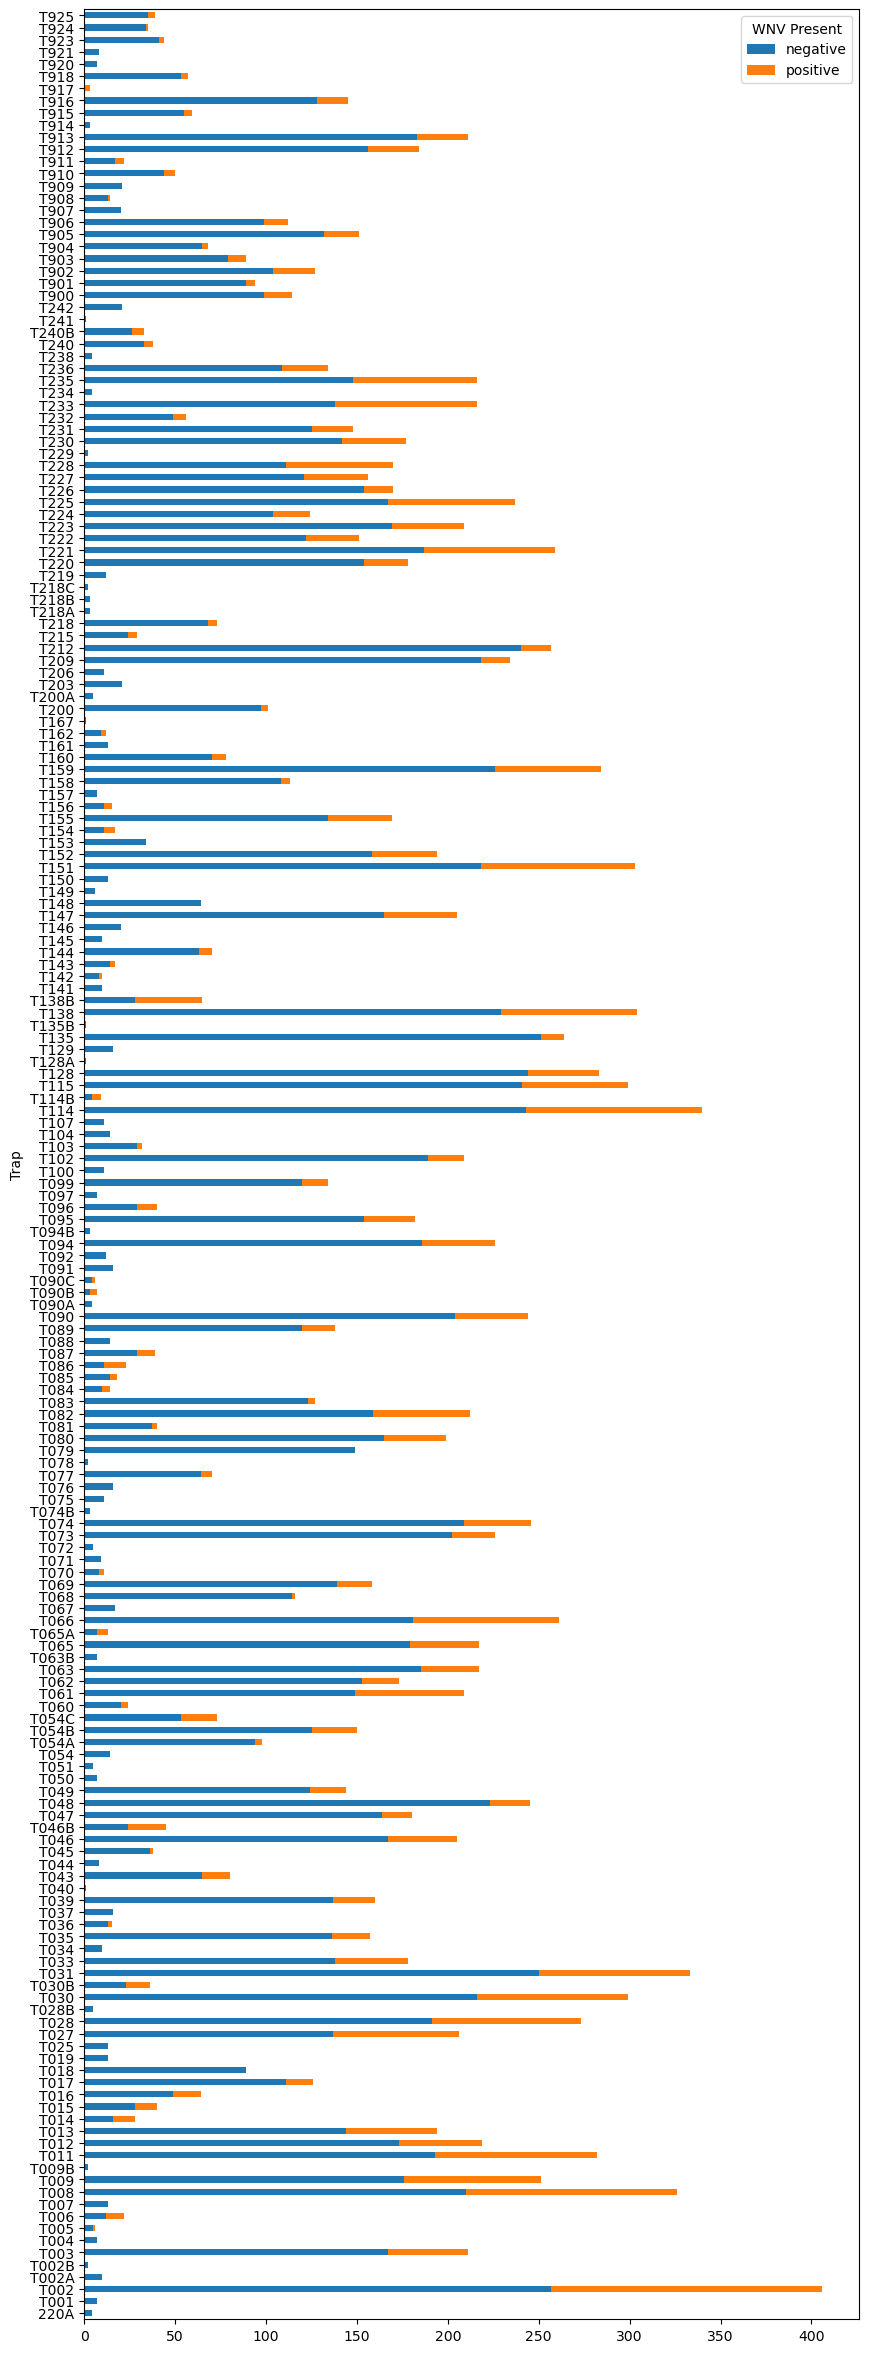

In [133]:
for col in large_categorical_df.columns[:-1]:
    
    agg_df = large_categorical_df.groupby([col,'WNV Present'])[col].count()
    agg_df.unstack().plot(kind = 'barh',stacked = True, figsize=(10,30))
    plt.show()